## Decision Tree Model


A [decision tree](https://en.wikipedia.org/wiki/Decision_tree) is a decision support tool that uses a tree-like graph or model of decisions and their outcomes.  The decision tree can be linearized into decision rules, where the outcome is the contents of the leaf node, and the conditions along the path form a conjunction in the if clause. In general, the rules have the form:

$if \quad condition1 \quad and \quad condition2 \quad and \quad condition3 \quad then \quad outcome$

Each node in the tree is a decisions/tests. Each path from the tree root to a leaf corresponds to a conjunction of attribute decisions/tests. The tree itself corresponds to a disjunction of these conjunctions.



### Growing a Decision Tree

Top-down: Which attribute shoud ne the root?

We construct a tree from the top down starting with the question:  which attribute should be tested at the root of the tree? That is, which attribute best splits/sperates the labled training data.

Then build subtrees recursively, asking the same question on the remaining attributes.


### Information gain

Heuristic: choose the attribute that produces the “purest” nodes. That is, the most homogeneous splits. A popular impurity criterion is information gain. Information gain increases with the average purity of the subsets. The idea is to choose the attribute that gives greatest information gain as the root of the tree.


### Entropy

The notion of using entropy as a measure of change in system state and dynamics comes both from [statistical physics](https://en.wikipedia.org/wiki/Entropy) and from [information theory](https://en.wikipedia.org/wiki/Entropy_(information_theory)). In statistical physics, entropy is a measure of disorder and uncertainty in a random variable; the higher the entropy, the greater the disorder. [(Gray,1990), (Behara et al., 1973), (Yeung,2002) ] In the statistical physics context, the term usually refers to [Gibbs entropy](https://en.wikipedia.org/wiki/Entropy_(statistical_thermodynamics)#Gibbs_Entropy_Formula), which measures the macroscopic state of the system as defined by a distribution of atoms and molecules in a thermodynamic system. Gibbs entropy is a measure of the disorder in the arrangements of its particles. As the position of a particle becomes less predictable, the entropy increases. For a classical system (i.e., a collection of classical particles) with a discrete set of microstates, if $E_i$ is the energy of microstate $i$, and $p_i$ is the probability that it occurs during the system's fluctuations, then the entropy of the system is

$$
S = -k_\text{B}\,\sum_i p_i \ln \,p_i
$$

The quantity $k_\text{B}$ is a physical constant known as [Boltzmann's constant](https://en.wikipedia.org/wiki/Boltzmann_constant), which, like the entropy, has units of heat capacity. The logarithm is dimensionless.

In information theory, entropy is also a measure of the uncertainty in a random variable. [(Cover & Thomas, 1991),(Emmert-Streib & Dehmer, 2009)] In this context, however, the term usually refers to the [Shannon entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)), which quantifies the expected value of the information contained in a message (or the expected value of the information of the probability distribution). The concept was introduced by [Claude E. Shannon](https://en.wikipedia.org/wiki/Claude_Shannon) in his 1948 paper "A Mathematical Theory of Communication." [(Shannon, 1948)] Shannon entropy establishes the limits to possible data compression and channel capacity.  That is, the entropy gives a lower bound for the efficiency of an encoding scheme (in other words, a lower bound on the possible compression of a data stream). Typically this is expressed in the number of ‘bits’ or ‘nats’ that are required to encode a given message. Given the probability of each of n events, the information required to predict an event is the distribution’s entropy. Low entropy means the system is very ordered, that is, very predictable. High entropy means the system is mixed, that is, very un predictable; a lot of information is needed for prediction. 


The Shannon entropy can explicitly be written as

$$
E(X) = \sum_{i} {\mathrm{P}(x_i)\,\mathrm{I}(x_i)} = -\sum_{i} {\mathrm{P}(x_i) \log_b \mathrm{P}(x_i)},
$$

where b is the base of the logarithm used. Common values of b are 2, Euler's number e, and 10, and the unit of entropy is shannon for b = 2, nat for b = e, and hartley for b = 10.When b = 2, the units of entropy are also commonly referred to as bits.


The Shannon entropy is by far the most common information-theoretic measure there are others. Other information-theoretic measures include: plog,Rényi entropy, Hartley entropy, collision entropy, min-entropy, Kullback-Leibler divergence and the information dimension.


## ID3 algorithm

This idea of iteratively finding the attribute with the most information gain to find a root in decision tree learning is called the  [ID3 (Iterative Dichotomiser 3)](https://en.wikipedia.org/wiki/ID3_algorithm) algorithm. The invented by [Ross Quinlan](https://en.wikipedia.org/wiki/Ross_Quinlan). It is a simple algorithm once one understands the concept of entropy and information gain.  

1.  Calculate the entropy of every attribute using the data set S, using the Shannon entropy.
2. Split the set S into subsets using the attribute for which entropy is minimum (or, equivalently, information gain is maximum)  
3. Make the decision tree (or sub-tree) root node that attribute.  
4. Recur on subsets using remaining attributes.  


### C4.5 algorithm

[C4.5](https://en.wikipedia.org/wiki/C4.5_algorithm) is an extension of Quinlan's earlier ID3 algorithm. The splitting criterion is based on statistical confidence estimates. This technique has the advantage that it allows all of the available labeled data to be used for training. To generate this confidence one calculates the error rate over $n$ labled training instances. The observed error rate $e$ is analaogous to the observed fraction of heads in $n$  tosses of a biased coin (i.e. the probability of heads may not be 0.5). One wishes to estimate the true error rate, $p$ from the observed error rate $e$.   

The confidence interval, is calculated as follows, if one chooses a level of confidence $z$ then 

$$
p = e + z \times \sqrt{e \times \frac{1-e}{n}}
$$  

Paired values for z and confidence levels (z,confidence) are in the following lists: (0.67 z, 50% confidence), (1.0 z, 68% confidence) , (1.64 z, 90% confidence) and (1.96 z, 95% confidence).


In [18]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn import svm # SVM classifier
from sklearn.neural_network import MLPClassifier # MLP classifier
from sklearn import cross_validation # used to test classifier
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve # ROC Curves
from sklearn.metrics import auc # Calculating AUC for ROC's!
import warnings
warnings.filterwarnings('ignore')

## Breast Cancer Wisconsin (Diagnostic) Data Set

In the project we'll be using the _Breast Cancer Wisconsin (Diagnostic) Data Set_ to predict whether the cancer is benign or malignant. 

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This data set is from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

This data set is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

In [19]:
field_names_df = pd.read_table('http://nikbearbrown.com/YouTube/MachineLearning/DATA/wpbc_data_field_names.txt',header=None)
field_names=field_names_df[0].tolist()
field_names

['ID',
 'diagnosis',
 'radius_mean',
 'radius_sd_error',
 'radius_worst',
 'texture_mean',
 'texture_sd_error',
 'texture_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'perimeter_worst',
 'area_mean',
 'area_sd_error',
 'area_worst',
 'smoothness_mean',
 'smoothness_sd_error',
 'smoothness_worst',
 'compactness_mean',
 'compactness_sd_error',
 'compactness_worst',
 'concavity_mean',
 'concavity_sd_error',
 'concavity_worst',
 'concave_points_mean',
 'concave_points_sd_error',
 'concave_points_worst',
 'symmetry_mean',
 'symmetry_sd_error',
 'symmetry_worst',
 'fractal_dimension_mean',
 'fractal_dimension_sd_error',
 'fractal_dimension_worst']

In [20]:
breast_cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None,names = field_names)
breast_cancer.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
breast_cancer.groupby('diagnosis').count()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


In [22]:
breast_cancer.describe()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [23]:
breast_cancer.groupby('diagnosis').median()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,908916.0,12.200,17.39,78.18,458.4,0.09076,0.07529,0.03709,0.02344,0.1714,...,13.35,22.820,86.92,547.4,0.12540,0.16980,0.1412,0.07431,0.2687,0.07712
M,895366.5,17.325,21.46,114.20,932.0,0.10220,0.13235,0.15135,0.08628,0.1899,...,20.59,28.945,138.00,1303.0,0.14345,0.35635,0.4049,0.18200,0.3103,0.08760


In [24]:
def scaled_df(df):
    scaled = pd.DataFrame()
    for item in df:
        if item in df.select_dtypes(include=[np.float]):
            scaled[item] = ((df[item] - df[item].min()) / 
            (df[item].max() - df[item].min()))
        else: 
            scaled[item] = df[item]
    return scaled
breast_cancer_scaled = scaled_df(breast_cancer)

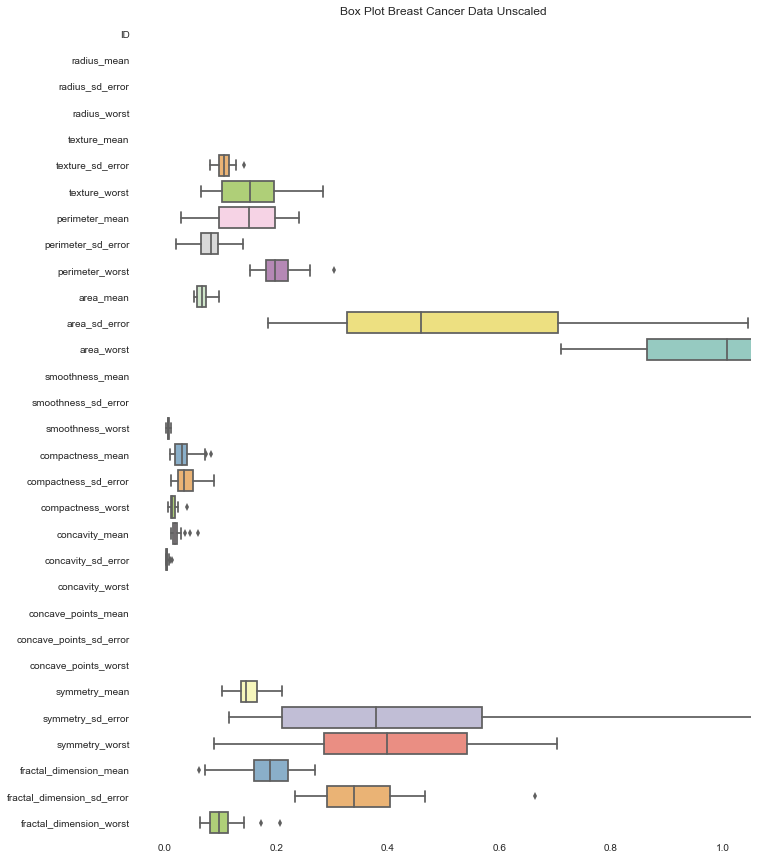

In [25]:
f, ax = plt.subplots(figsize=(11, 15))

ax.set_axis_bgcolor('#FFFFFF')
plt.title("Box Plot Breast Cancer Data Unscaled")
ax.set(xlim=(-.05, 1.05))
ax = sns.boxplot(data = breast_cancer[1:29], 
  orient = 'h', 
  palette = 'Set3')

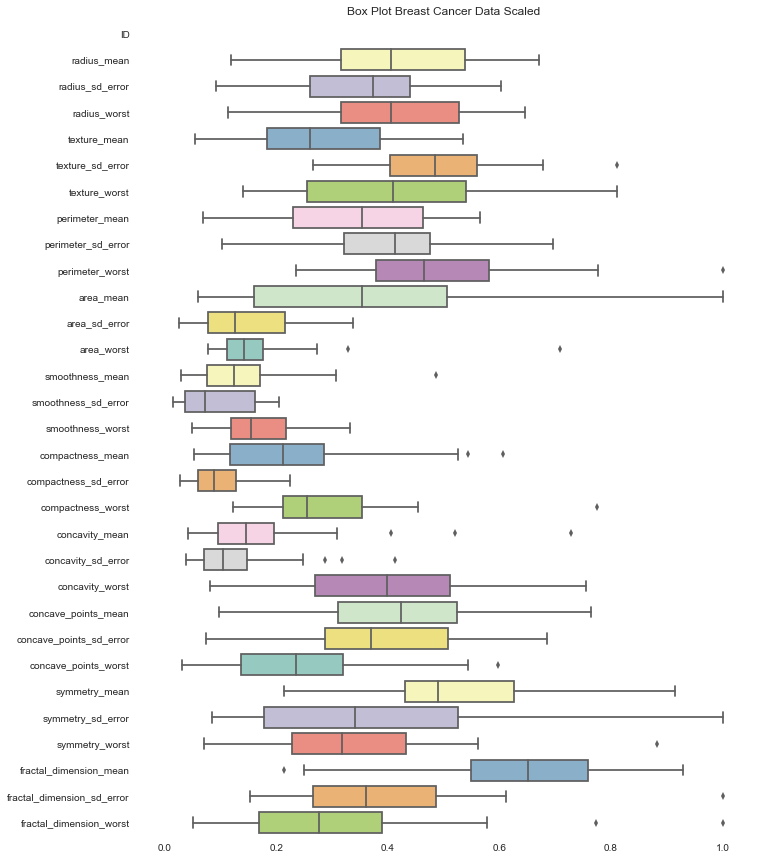

In [26]:
f, ax = plt.subplots(figsize=(11, 15))

ax.set_axis_bgcolor('#FFFFFF')
plt.title("Box Plot Breast Cancer Data Scaled")
ax.set(xlim=(-.05, 1.05))
ax = sns.boxplot(data = breast_cancer_scaled[1:29], 
  orient = 'h', 
  palette = 'Set3')

In [27]:
predictor_names=field_names_df[0].tolist()
predictor_names=predictor_names[2:]
predictor_names

['radius_mean',
 'radius_sd_error',
 'radius_worst',
 'texture_mean',
 'texture_sd_error',
 'texture_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'perimeter_worst',
 'area_mean',
 'area_sd_error',
 'area_worst',
 'smoothness_mean',
 'smoothness_sd_error',
 'smoothness_worst',
 'compactness_mean',
 'compactness_sd_error',
 'compactness_worst',
 'concavity_mean',
 'concavity_sd_error',
 'concavity_worst',
 'concave_points_mean',
 'concave_points_sd_error',
 'concave_points_worst',
 'symmetry_mean',
 'symmetry_sd_error',
 'symmetry_worst',
 'fractal_dimension_mean',
 'fractal_dimension_sd_error',
 'fractal_dimension_worst']

In [28]:
def rank_predictors(dat,l,f='diagnosis'):
    rank={}
    max_vals=dat.max()
    median_vals=dat.groupby(f).median()  # We are using the median as the mean is sensitive to outliers
    for p in l:
        score=np.abs((median_vals[p]['B']-median_vals[p]['M'])/max_vals[p])
        rank[p]=score
    return rank
cat_rank=rank_predictors(breast_cancer,predictor_names) 
cat_rank

{'area_mean': 0.00035919540229885377,
 'area_sd_error': 0.10083536373129133,
 'area_worst': 0.0011258955987717171,
 'compactness_mean': 0.090694239290989687,
 'compactness_sd_error': 0.047285353535353548,
 'compactness_worst': 0.097442697480583443,
 'concave_points_mean': 0.12363746467501009,
 'concave_points_sd_error': 0.203343949044586,
 'concave_points_worst': 0.17762106252938412,
 'concavity_mean': 0.017606079797340073,
 'concavity_sd_error': 0.031216487935656838,
 'concavity_worst': 0.20088790233074363,
 'fractal_dimension_mean': 0.37006872852233669,
 'fractal_dimension_sd_error': 0.062669478758662286,
 'fractal_dimension_worst': 0.050506024096385493,
 'perimeter_mean': 0.26771321462043107,
 'perimeter_sd_error': 0.31232604373757455,
 'perimeter_worst': 0.060855263157894794,
 'radius_mean': 0.18231945926716484,
 'radius_sd_error': 0.10361507128309573,
 'radius_worst': 0.19108753315649865,
 'smoothness_mean': 0.083189262966333027,
 'smoothness_sd_error': 0.071606418295831795,
 'smo

In [29]:
cat_rank=sorted(cat_rank.items(), key=lambda x: x[1])
cat_rank

[('area_mean', 0.00035919540229885377),
 ('area_worst', 0.0011258955987717171),
 ('smoothness_worst', 0.010295534853838727),
 ('concavity_mean', 0.017606079797340073),
 ('concavity_sd_error', 0.031216487935656838),
 ('compactness_sd_error', 0.047285353535353548),
 ('fractal_dimension_worst', 0.050506024096385493),
 ('perimeter_worst', 0.060855263157894794),
 ('fractal_dimension_sd_error', 0.062669478758662286),
 ('texture_sd_error', 0.070012239902080733),
 ('smoothness_sd_error', 0.071606418295831795),
 ('symmetry_mean', 0.081087151841868751),
 ('smoothness_mean', 0.083189262966333027),
 ('compactness_mean', 0.090694239290989687),
 ('compactness_worst', 0.097442697480583443),
 ('area_sd_error', 0.10083536373129133),
 ('radius_sd_error', 0.10361507128309573),
 ('concave_points_mean', 0.12363746467501009),
 ('texture_worst', 0.16519976838448178),
 ('symmetry_sd_error', 0.17632325141776936),
 ('concave_points_worst', 0.17762106252938412),
 ('radius_mean', 0.18231945926716484),
 ('texture_

In [30]:
# Take the top predictors based on median difference
ranked_predictors=[]
for f in cat_rank[18:]:
    ranked_predictors.append(f[0])
ranked_predictors

['texture_worst',
 'symmetry_sd_error',
 'concave_points_worst',
 'radius_mean',
 'texture_mean',
 'radius_worst',
 'concavity_worst',
 'concave_points_sd_error',
 'symmetry_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'fractal_dimension_mean']

In [31]:
X = breast_cancer_scaled[predictor_names]
#setting target
y = breast_cancer_scaled["diagnosis"]

In [32]:
#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state=0)


In [33]:
# Decision Tree classifier

DTm = DecisionTreeClassifier()
                                
# Decision Tree cross validation

print("KfoldCrossVal mean score using Decision Tree is %s" %cross_val_score(DTm,X,y,cv=10).mean())

# Decision Tree metrics
sm = DTm.fit(X_train, y_train)

y_pred = sm.predict(X_test)
print("Accuracy score using Decision Tree is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using Decision Tree is 0.908881038804
Accuracy score using Decision Tree is 0.907894736842


## Random Forest Model

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

In [34]:
# Random Forest classifier

RFm = RandomForestClassifier(random_state = 42, 
                                criterion='gini',
                                n_estimators = 500,
                                max_features = 5)
                                
# Random Forest cross validation

print("KfoldCrossVal mean score using Random Forest is %s" %cross_val_score(RFm,X,y,cv=10).mean())

# Random Forest metrics
sm = RFm.fit(X_train, y_train)

y_pred = sm.predict(X_test)
print("Accuracy score using Random Forest is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using Random Forest is 0.963244317691
Accuracy score using Random Forest is 0.938596491228
